In [2]:
# importing libraries
import numpy 
import seaborn as sns
from numpy import arange
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import explained_variance_score

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,10

In [4]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df
items=pd.DataFrame(boston.data,columns=boston.feature_names)
items.to_csv("boston_sklearn.csv")
items.shape
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [5]:
names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT','MEDV']
df=pd.read_csv('boston housing.csv',delim_whitespace=True,names=names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [6]:
df.shape

(506, 14)

In [7]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [8]:
set_option('precision',1)
print(df.describe())

          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PTRATIO      B  LSTAT   MEDV  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11.4   21.2  


In [9]:
set_option('precision',2)
print(df.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

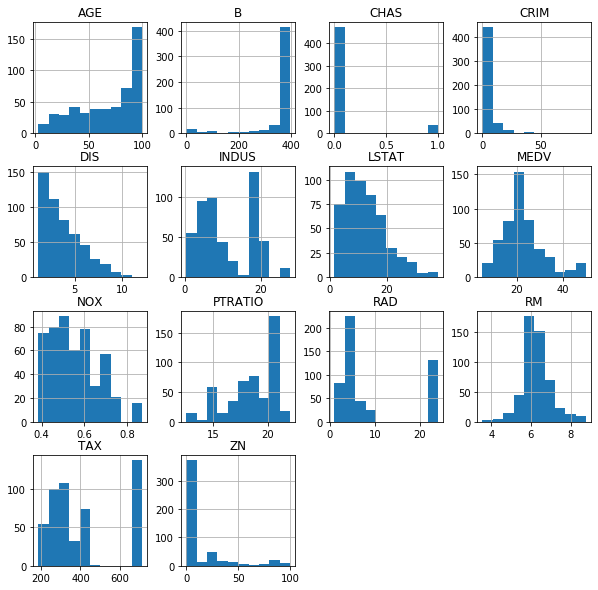

In [10]:
df.hist()
plt.show()

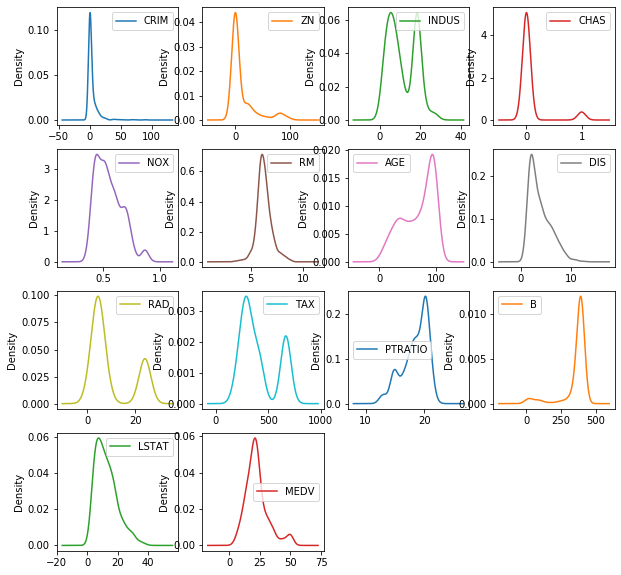

In [11]:
df.plot(kind='density',subplots=True,layout=(4,4),sharex=False)
plt.show()

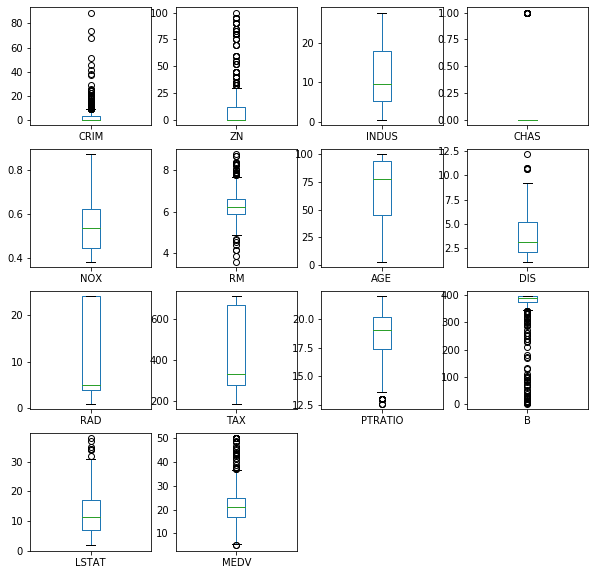

In [12]:
df.plot(kind='box',subplots=True,layout=(4,4),sharex=False)
plt.show()

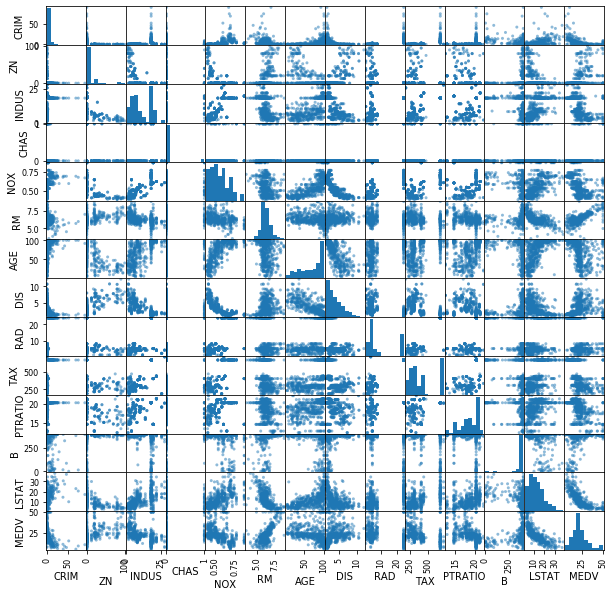

In [13]:
scatter_matrix(df)
plt.show()

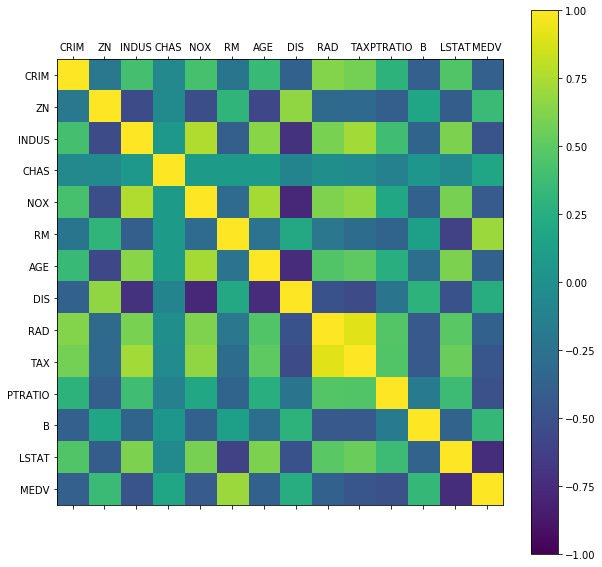

In [14]:
#correlation matrix
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(df.corr(),vmin=-1,vmax=1,interpolation='none')
fig.colorbar(cax)
ticks=arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

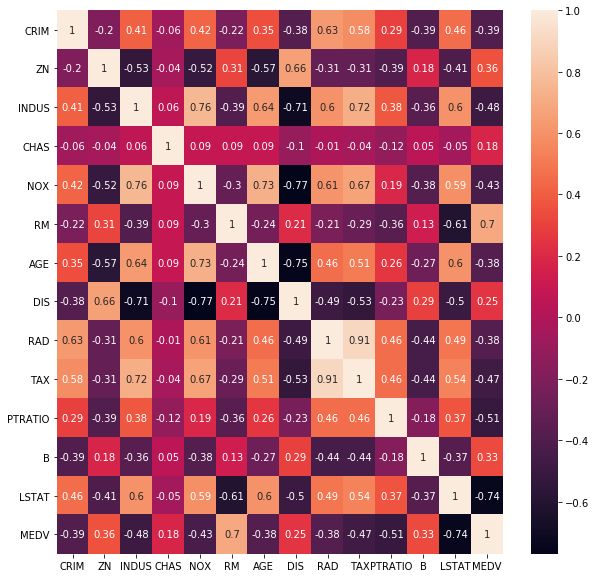

In [15]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

['LSTAT', 'RM']

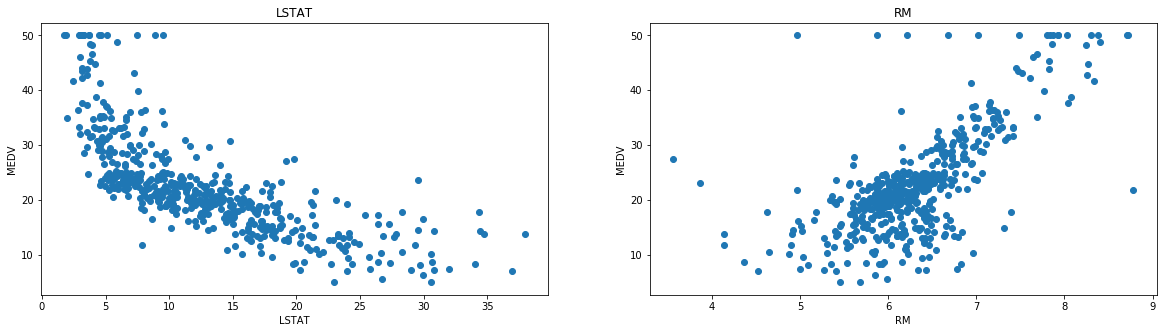

In [16]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
features

In [24]:
X = numpy.array(df.iloc[:,0:13])
Y = numpy.array(df.iloc[:,-1])

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)


In [26]:
# applying column standardization on train and test data
s=StandardScaler()
x_train=s.fit_transform(numpy.array(x_train))
x_test=s.transform(numpy.array(x_test))

In [27]:
#training data for manual SGD regressor
df1=pd.DataFrame(data=x_train)
df1['price']=y_train

In [28]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,-0.28,-0.51,-0.40,-0.27,-0.12,-0.85,0.96,-0.02,-0.64,-0.58,1.18,-3.02e-04,0.84,13.1
1,-0.41,3.33,-1.43,3.66,-1.31,2.36,-1.52,1.00,-0.98,-1.23,-2.20,4.13e-01,-1.33,50.0
2,8.06,-0.51,1.08,-0.27,1.11,-0.48,1.14,-0.99,1.67,1.55,0.81,-3.85e+00,1.16,8.8
3,-0.40,-0.51,0.16,-0.27,0.19,-0.24,0.32,-0.75,-0.98,-0.79,1.18,4.28e-01,-0.48,20.6
4,0.70,-0.51,1.08,-0.27,1.23,0.17,1.14,-1.07,1.67,1.55,0.81,1.95e-01,1.11,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.25,-0.51,1.08,-0.27,0.27,-0.25,0.43,-0.14,1.67,1.55,0.81,3.81e-01,0.36,19.1
400,-0.40,1.41,-1.10,-0.27,-1.00,1.30,-1.02,0.36,-0.52,-0.04,-1.47,4.28e-01,-1.01,34.9
401,-0.39,-0.51,-0.17,-0.27,0.29,-0.89,-1.38,-0.50,-0.41,-0.08,0.35,3.88e-01,0.73,23.1
402,-0.38,-0.51,-0.04,-0.27,-0.55,0.05,-0.54,0.25,-0.64,-0.76,0.08,4.06e-01,-0.21,24.4


# Training/model fitting:
Fit the model to selected supervised data

In [19]:
m=0.5
c=0.1
alpha=0.001
n=5000
for i in range(n):
    slope=0
    intercept=0
    for j in range(lx):
        ri=numpy.random.randint(lx)
        intercept=intercept+((m*x_train[ri:ri+1]+c)-y_train[ri:ri+1])
        slope=slope+((m*x_train[ri:ri+1]+c)-y_train[ri:ri+1])*x_train[ri:ri+1]
        c=c-alpha*(intercept/lx)
        m=m-alpha*(slope/lx)

In [20]:
print(f'slope is {m}')
print(f'intercept is {c}')

slope is [8.98463729]
intercept is [-32.76573987]


In [21]:
X_test=numpy.array(x_test)

In [22]:
#numpy.dot(m[0],x_test)+c
y_pred=numpy.dot(m[0],X_test)+c
y_pred

array([39.47074392, 26.80240535, 24.88867761, 11.31289066, 36.33510551,
       14.88877631, 29.91108985, 27.66493053, 27.56609952, 25.06837035,
       33.86433026, 21.0073143 , 20.89051401, 32.24709554, 25.97581872,
       20.22565085,  8.8151615 , 15.78724003, 15.66145511, 18.958817  ,
       12.99301784, 24.48436893, 41.50127195, 24.5742153 , 30.91736923,
       19.83032681, 24.52030748, 22.72338002, 23.98122924, 26.34418885,
       19.84829609, 15.87708641, 20.12681984, 33.6576836 , 25.58947931,
       24.07107561, 26.81138999, 20.20768158, 42.68724407, 30.34235244,
       22.87611885, 12.32815468, 26.6945897 , 20.92645256, 26.07464973,
       28.96770293,  7.83583603, 20.791683  , 22.23820961, 22.70541074,
       22.28313279, 21.88780875, 23.71169012, 22.00460904, 18.52755441,
       24.58319994, 37.49412372, 25.85901843, 27.23366794, 20.80965228,
       21.38466906, 21.3217766 , 18.38380021, 29.61459682, 22.28313279,
       15.29308498, 25.58947931, 23.03784232, 20.791683  , 20.28

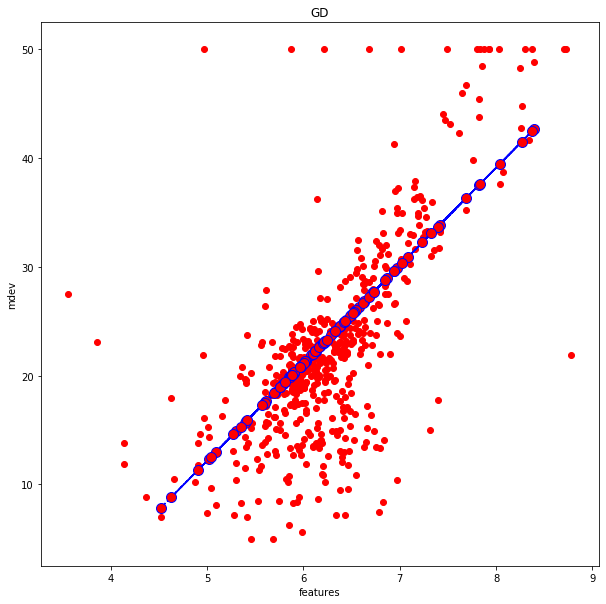

In [23]:
plt.plot(x_test,y_pred,marker='o',color='blue',markerfacecolor='red',markersize=10,linestyle='dashed')
plt.scatter(x,y,marker='o',color='red')
plt.xlabel('features')
plt.ylabel('mdev')
plt.title('GD')
plt.show()

In [24]:
print(mean_squared_error(y_test,y_pred))
print(numpy.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

25.805057763264504
5.079867888367226
3.697867216949642
0.698462682503582
0.6704076808273418


In [24]:
from sklearn.linear_model import SGDRegressor

In [25]:
sgd=SGDRegressor(max_iter=4000,penalty=None,eta0=0.1,alpha=0.01)
x_train=x_train.reshape(-1,1)
sgd.fit(x_train,y_train)

SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=4000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [26]:
x_test=x_test.reshape(-1,1)
y_pred=sgd.predict(x_test)

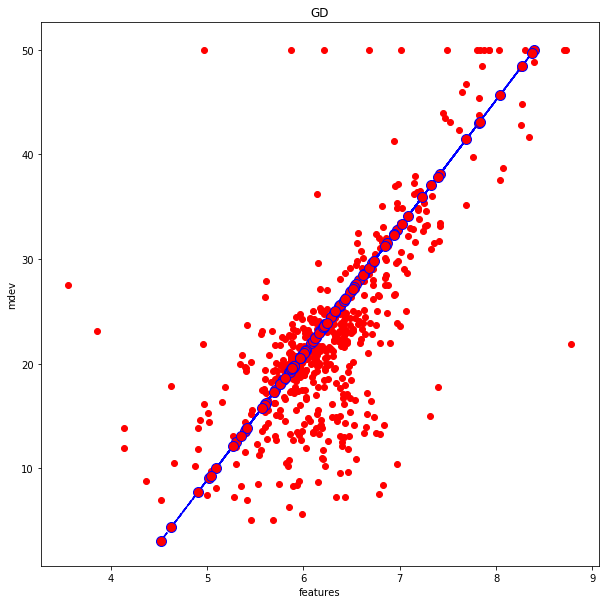

In [27]:
plt.plot(x_test,y_pred,marker='o',color='blue',markerfacecolor='red',markersize=10,linestyle='dashed')
plt.scatter(x,y,marker='o',color='red')
plt.xlabel('features')
plt.ylabel('mdev')
plt.title('GD')
plt.show()

In [28]:
print(mean_squared_error(y_test,y_pred))
print(numpy.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

29.911961760164555
5.4691829152227625
3.9858754175135473
0.6769915181838733
0.6179526921435068
